### Решение задания "Векторизация"
Подготовил Булкин Антон студент 317 группы ВМК МГУ

In [1]:
#generator
import numpy as np
import random
import time
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gc

%matplotlib inline

%config InlineBackend.figure_format = 'svg'

warnings.filterwarnings('ignore')


data = pd.DataFrame({'time(seconds)':[], 'size':[], 'test_type':[]})

Решение, реализованное полоностью с помощью NumPy:

In [2]:
def replace_nan_to_means_numpy(X):
    matrix = X.copy()
    nan_indexes = np.where(np.isnan(matrix))
    means = np.nanmean(matrix, axis=0)
    means = np.where(np.isnan(means), 0, means)
    matrix[nan_indexes] = means[nan_indexes[1]]
    return matrix

Решение с частичным использованием Numpy:

In [3]:
def replace_nan_to_means_partial_numpy(X):
    matrix = X.copy()
    nan_indexes = np.where(np.isnan(matrix))
    means = {}
    for i in nan_indexes[1]:
      cnt = 0
      mean = 0
      for j in range(matrix.shape[0]):
        if not(np.isnan(matrix[j, i])):
          cnt += 1
          mean += matrix[j, i]
      if (cnt == 0):
        means[i] = 0.
      else:
        means[i] = mean / cnt
    for i in list(zip(nan_indexes[0], nan_indexes[1])):
        matrix[i[0], i[1]] = means[i[1]]
    return matrix

Решение без использования NumPy:

In [4]:
def replace_nan_to_means_without_numpy(X):
    matrix = X[:]
    means = []
    for i in range(len(matrix[0])):
      cnt = 0
      mean = 0
      for j in range(len(matrix)):
        if not(matrix[j][i] == np.nan):
          cnt += 1
          mean += matrix[j][i]
      if (cnt == 0):
        means.append(0.)
      else:
        means.append(mean / cnt)
    for i in range(len(matrix)):
      for j in range(len(matrix[0])):
        if matrix[i][j] == np.nan:
          matrix[i][j] = means[i]
    return matrix

Создадим матрицы, заполненные слычайными числами и np.nan, и протестируем на них время работы получившихся реализаций:

In [5]:
for size in range(1, 2001, 100):
  gc.collect()
  data_b = np.random.randint(1000, 1000000, size=(size, size))
  data_b = data_b*0.001
  n_b = random.randrange(0, size + 1)
  index_b = np.random.choice(data_b.size, n_b, replace=False)
  data_b.ravel()[index_b] = np.nan
  X = data_b
  start = time.time()
  replace_nan_to_means_numpy(X)
  end = time.time()
  data = data._append({'time':(end-start) * 10, 'size':size, 'test_type':'using_numpy'}, ignore_index = True)
  start = time.time()
  replace_nan_to_means_partial_numpy(X)
  end = time.time()
  data = data._append({'time':(end-start) * 10, 'size':size, 'test_type':'using_partial_numpy'}, ignore_index = True)
  tmp = X.tolist()
  start = time.time()
  replace_nan_to_means_without_numpy(tmp)
  end = time.time()
  data = data._append({'time':(end-start) * 10, 'size':size, 'test_type':'without_numpy'}, ignore_index = True)

График зависимости времени работы реализаций в зависимости от размера входных данных:

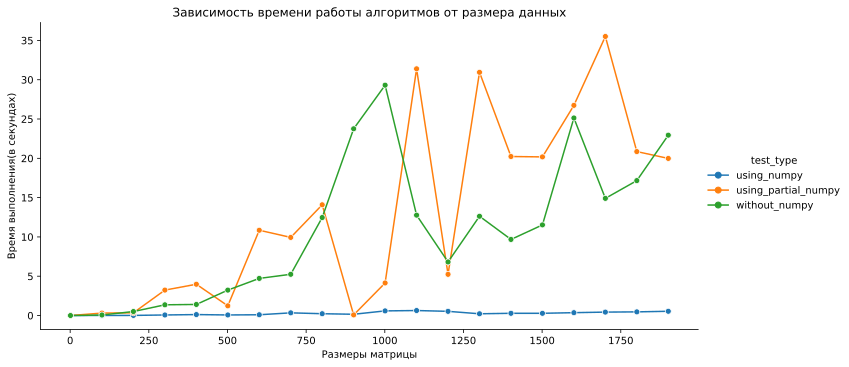

In [6]:
sns.relplot(data=data, y='time', x='size', hue='test_type', kind='line', marker='o', height=5, aspect=2).set(
    title="Зависимость времени работы алгоритмов от размера данных")
plt.xlabel('Размеры матрицы')
plt.ylabel('Время выполнения(в секундах)')
plt.show()

**Результат:** Как видно из графика результатов, реализация, сделанная полностью при помощи NumPy работает намного быстрее других реализаций.